In [1]:
from velocity import get
from velocity.velocity_data import particle_type
from velocity.velocity_data import dm_mass
from velocity.velocity_data import find_circ_vel
from velocity.velocity_data import star_pos_vel
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
r,vel_circ = find_circ_vel()

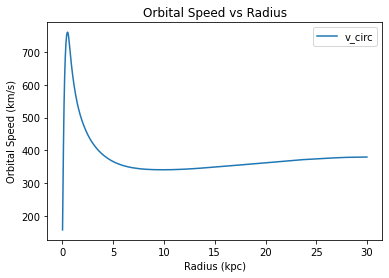

In [3]:
plt.plot(r,vel_circ, label = "v_circ")

plt.legend()

plt.xlabel("Radius (kpc)")
plt.ylabel("Orbital Speed (km/s)")
plt.title("Orbital Speed vs Radius")
plt.savefig("OrbitalVel_tot.png",dpi=200)

plt.show()

In [4]:
pos,vel_raw,star_masses = star_pos_vel()

(1707327, 3)
(1707327, 3)


Galaxy Angular Momentum

In [5]:
radius = np.sqrt(pos[:,0]**2 + pos[:,1]**2 + pos[:,2]**2)
stars_select = np.where(radius < 30)[0]
vel = np.array((vel_raw[stars_select, 0], vel_raw[stars_select, 1], vel_raw[stars_select, 2])).T
rad = np.array((pos[stars_select, 0], pos[stars_select, 1], pos[stars_select, 2])).T
mass = np.array((star_masses[stars_select],star_masses[stars_select],star_masses[stars_select])).T
print(np.shape(mass),mass)

(1691595, 3) [[ 58733.73   58733.73   58733.73 ]
 [ 39639.5    39639.5    39639.5  ]
 [ 61499.332  61499.332  61499.332]
 ...
 [111648.32  111648.32  111648.32 ]
 [ 42169.69   42169.69   42169.69 ]
 [ 72179.24   72179.24   72179.24 ]]


In [6]:
J_raw = mass*(np.cross(rad,vel))

J = np.sum(J_raw,axis=0)

print(J)

J_mag = np.sqrt(np.dot(J,J))

print(J_mag)

[2.36394146e+13 1.40097362e+13 1.95933226e+12]
27548749777891.668


In [7]:
#still needs to be reworked into array format


Vertical Unit Vector

In [8]:
n_j = J/J_mag

print(n_j,n_j.T.shape,n_j.shape)

[0.85809392 0.50854345 0.07112237] (3,) (3,)


2d Radius and Radial Unit Vector

In [9]:
r_2d_sub = np.outer((np.dot(rad,n_j.T)),n_j)

r_2d = rad - r_2d_sub

r_2d_mag = np.sqrt(r_2d[:,0]*r_2d[:,0]+r_2d[:,1]*r_2d[:,1] + r_2d[:,2]*r_2d[:,2])

print(r_2d_mag)
n_r = np.array((r_2d[:,0]/r_2d_mag,r_2d[:,1]/r_2d_mag,r_2d[:,2]/r_2d_mag)).T
print(n_r)

[ 0.02963138  0.03247419  0.0326361  ... 22.14579054 18.95050254
 11.75717618]
[[-0.30520991  0.39373282  0.86707634]
 [-0.51024576  0.82889781  0.22929826]
 [-0.15075295  0.11709044  0.98161264]
 ...
 [-0.02789202  0.18446345 -0.98244352]
 [-0.42235019  0.62020643  0.66103275]
 [ 0.42534893 -0.62635206 -0.65326976]]


Rotational Unit Vector

In [10]:
n_phi = np.cross(n_j,n_r)

Galaxy Reference Frame Velocities

In [11]:
v_phi = (vel[:,0]*n_phi[:,0] + vel[:,1]*n_phi[:,1] + vel[:,2]*n_phi[:,2])
v_r = (vel[:,0]*n_r[:,0] + vel[:,1]*n_r[:,1] + vel[:,2]*n_r[:,2]) 
v_j = np.dot(vel,n_j)

In [12]:
v_final = ((vel[:,0]*vel[:,0] + vel[:,1]*vel[:,1] + vel[:,2]*vel[:,2]) - v_r**2 - v_j**2)

print(v_j.shape)

(1691595,)


In [13]:
radius = np.sqrt((rad[:,0]*rad[:,0] + rad[:,1]*rad[:,1] + rad[:,2]*rad[:,2]))

In [14]:
#scipy interpolate the vel_circ
from scipy import interpolate
print(r.shape,vel_circ.shape)
f = interpolate.interp1d(r, vel_circ,bounds_error = False,fill_value = 'extrapolate')

new_v_circ = f(radius)
print(np.shape(new_v_circ))
print(len(r),radius.shape)

(999,) (999,)
(1691595,)
999 (1691595,)


Epsilon

[0.290579 0.290579 0.290579]


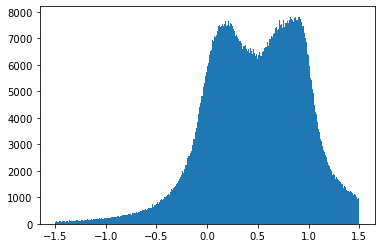

In [15]:
e_v = v_phi/new_v_circ



e_v_final, y = np.histogram(e_v)

y_final = (y[1:]+y[:-1])/2

below = np.where(e_v < 0)[0]

mass_below = sum(mass[below])

print(2*mass_below/sum(mass))

bins = np.linspace(-1.5,1.5,500)
#plt.plot(e_v_final, y_final, label = "epsilon")

plt.hist(e_v,bins = bins)

plt.show()